# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.11.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **15th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Tanzania', 'Timor-Leste'],
 3: ['Fiji', 'Grenada'],
 4: ['Saint Lucia', 'Dominica'],
 5: ['Antigua and Barbuda', 'Equatorial Guinea', 'Brunei',
     'Saint Vincent and the Grenadines'],
 6: ['Seychelles', 'Cambodia'],
 7: ['Kyrgyzstan', 'Kazakhstan', 'Gambia', 'Trinidad and Tobago'],
 8: ['Namibia', 'Eritrea', 'Bhutan', 'Madagascar', 'Malawi', 'Liechtenstein',
     'South Africa', 'Ghana', 'Bermuda', 'Zimbabwe', 'Bahamas', 'Belize',
     'Mongolia', 'Lesotho', 'Botswana', 'Sao Tome and Principe', 'Mauritius',
     'Papua New Guinea'],
 9: ['Myanmar', 'Bolivia', 'Vietnam', 'Honduras', 'Saudi Arabia', 'Sudan',
     'New Zealand', 'Zambia', 'Burundi', 'Guatemala', 'Monaco', 'Egypt',
     'Chile', 'Barbados', 'Oman', 'Djibouti', 'Suriname', 'Haiti', 'Singapore',
     'Senegal', 'Comoros', 'Benin', 'Rwanda', 'Taiwan', 'Yemen', 'Uzbekistan',
     'Liberia', 'Australia', 'Swaziland'],
 10: ['Azerbaijan', 'Cameroon', 'Ethiopia', 'Panama', 'Philippines',
      'Palestine', 'Maldives', 'Gu

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=15)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{15: ['Belgium', 'Spain', 'Estonia', 'France', 'Austria'], 16: ['Finland']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Finland 0th    Past  12Feb2020  25Mar2020     5515525
        1st    Past  26Mar2020  06Apr2020     5515525
        2nd    Past  07Apr2020  16Apr2020     5515525
        3rd    Past  17Apr2020  27Apr2020     5515525
        4th    Past  28Apr2020  07May2020     5515525
        5th    Past  08May2020  28May2020     5515525
        6th    Past  29May2020  09Aug2020     5515525
        7th    Past  10Aug2020  07Sep2020     5515525
        8th    Past  08Sep2020  23Sep2020     5515525
        9th    Past  24Sep2020  04Oct2020     5515525
        10th   Past  05Oct2020  11Oct2020     5515525
        11th   Past  12Oct2020  19Oct2020     5515525
        12th   Past  20Oct2020  27Oct2020     5515525
        13th   Past  28Oct2020  02Nov2020     5515525
        14th   Past  03Nov2020  08Nov2020     5515525
        15th   Past  09Nov2020  15Nov2020     5515525

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	ESP, 11th phase (14Oct2020 - 20Oct2020): finished  408 trials in 0 min 10 sec

	ESP,  3rd phase (16Apr2020 - 20Jul2020): finished  372 trials in 0 min 10 sec

	FRA, 12th phase (15Oct2020 - 24Oct2020): finished  367 trials in 0 min 10 sec

	ESP,  4th phase (21Jul2020 - 10Aug2020): finished  399 trials in 0 min 10 sec

	BEL, 11th phase (13Oct2020 - 22Oct2020): finished  373 trials in 0 min 10 sec

	AUT,  8th phase (15Sep2020 - 22Sep2020): finished  372 trials in 0 min 10 sec

	BEL, 13th phase (02Nov2020 - 07Nov2020): finished  374 trials in 0 min 10 sec

	FRA,  9th phase (24Sep2020 - 01Oct2020): finished  373 trials in 0 min 10 sec

	ESP,  8th phase (14Sep2020 - 23Sep2020): finished  411 trials in 0 min 10 sec

	BEL,  3rd phase (20Apr2020 - 14May2020): finished  365 trials in 0 min 10 sec

	EST,  6th phase (05Aug2020 - 27Aug2020): finished  368 trials in 0 min 10 sec

	FRA,  4th phase (28Jul2020 - 19Aug2020): finished  365 trials in 0 min 10 sec

	FRA,  6th phase (01Sep2020 - 08Sep2020): finished  374 trials in 0 min 10 sec

	EST,  3rd phase (14Apr2020 - 27Apr2020): finished  370 trials in 0 min 10 sec

	EST,  9th phase (22Sep2020 - 29Sep2020): finished  374 trials in 0 min 10 sec

	FIN,  0th phase (12Feb2020 - 25Mar2020): finished  403 trials in 0 min 10 sec

	FIN,  3rd phase (17Apr2020 - 27Apr2020): finished  410 trials in 0 min 10 sec

	EST,  4th phase (28Apr2020 - 02Jun2020): finished  359 trials in 0 min 10 sec

	EST, 13th phase (30Oct2020 - 04Nov2020): finished  374 trials in 0 min 10 sec

	ESP, 13th phase (28Oct2020 - 03Nov2020): finished  410 trials in 0 min 10 sec

	BEL, 10th phase (07Oct2020 - 12Oct2020): finished  373 trials in 0 min 10 sec

	EST, 11th phase (08Oct2020 - 20Oct2020): finished  365 trials in 0 min 10 sec

	BEL,  6th phase (17Aug2020 - 08Sep2020): finished  362 trials in 0 min 10 sec

	FRA,  7th phase (09Sep2020 - 16Sep2020): finished  367 trials in 0 min 10 sec

	EST, 14th phase (05Nov2020 - 15Nov2020): finished  368 trials in 0 min 10 sec

	ESP,  2nd phase (28Mar2020 - 15Apr2020): finished  366 trials in 0 min 10 sec

	EST,  5th phase (03Jun2020 - 04Aug2020): finished  350 trials in 0 min 10 sec

	BEL,  5th phase (27Jul2020 - 16Aug2020): finished  367 trials in 0 min 10 sec

	FRA,  5th phase (20Aug2020 - 31Aug2020): finished  368 trials in 0 min 10 sec

	EST,  8th phase (11Sep2020 - 21Sep2020): finished  372 trials in 0 min 10 sec

	AUT, 11th phase (08Oct2020 - 14Oct2020): finished  372 trials in 0 min 10 sec

	EST, 12th phase (21Oct2020 - 29Oct2020): finished  372 trials in 0 min 10 sec

	BEL,  1st phase (30Mar2020 - 07Apr2020): finished  342 trials in 0 min 10 sec

	EST,  0th phase (15Mar2020 - 26Mar2020): finished  378 trials in 0 min 10 sec

	AUT,  0th phase (05Mar2020 - 21Mar2020): finished  348 trials in 0 min 10 sec

	BEL, 14th phase (08Nov2020 - 15Nov2020): finished  352 trials in 0 min 10 sec

	EST, 10th phase (30Sep2020 - 07Oct2020): finished  372 trials in 0 min 10 sec

	ESP,  7th phase (03Sep2020 - 13Sep2020): finished  410 trials in 0 min 10 sec

	FIN, 10th phase (05Oct2020 - 11Oct2020): finished  412 trials in 0 min 10 sec

	AUT,  9th phase (23Sep2020 - 30Sep2020): finished  374 trials in 0 min 10 sec

	FIN,  8th phase (08Sep2020 - 23Sep2020): finished  405 trials in 0 min 10 sec

	FIN,  4th phase (28Apr2020 - 07May2020): finished  411 trials in 0 min 10 sec

	BEL,  8th phase (21Sep2020 - 29Sep2020): finished  370 trials in 0 min 10 sec

	BEL,  9th phase (30Sep2020 - 06Oct2020): finished  374 trials in 0 min 10 sec

	ESP,  9th phase (24Sep2020 - 04Oct2020): finished  407 trials in 0 min 10 sec

	FRA,  8th phase (17Sep2020 - 23Sep2020): finished  371 trials in 0 min 10 sec

	BEL, 12th phase (23Oct2020 - 01Nov2020): finished  368 trials in 0 min 10 sec

	FIN, 13th phase (28Oct2020 - 02Nov2020): finished  405 trials in 0 min 10 sec

	ESP,  1st phase (17Mar2020 - 27Mar2020): finished  368 trials in 0 min 10 sec

	AUT, 12th phase (15Oct2020 - 20Oct2020): finished  372 trials in 0 min 10 sec

	FIN,  1st phase (26Mar2020 - 06Apr2020): finished  405 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 29Mar2020): finished  355 trials in 0 min 10 sec

	AUT, 13th phase (21Oct2020 - 30Oct2020): finished  371 trials in 0 min 10 sec

	BEL,  7th phase (09Sep2020 - 20Sep2020): finished  371 trials in 0 min 10 sec

	FRA,  3rd phase (27May2020 - 27Jul2020): finished  352 trials in 0 min 10 sec

	FIN, 14th phase (03Nov2020 - 08Nov2020): finished  411 trials in 0 min 10 sec

	FRA, 10th phase (02Oct2020 - 08Oct2020): finished  372 trials in 0 min 10 sec

	AUT,  1st phase (22Mar2020 - 29Mar2020): finished  373 trials in 0 min 10 sec

	FRA,  1st phase (30Mar2020 - 13Apr2020): finished  367 trials in 0 min 10 sec

	FRA, 13th phase (25Oct2020 - 03Nov2020): finished  367 trials in 0 min 10 sec

	AUT, 10th phase (01Oct2020 - 07Oct2020): finished  373 trials in 0 min 10 sec

	BEL,  0th phase (17Feb2020 - 29Mar2020): finished  405 trials in 0 min 10 sec

	FIN,  5th phase (08May2020 - 28May2020): finished  403 trials in 0 min 10 sec

	ESP, 10th phase (05Oct2020 - 13Oct2020): finished  407 trials in 0 min 10 sec

	EST,  1st phase (27Mar2020 - 02Apr2020): finished  371 trials in 0 min 10 sec

	ESP, 14th phase (04Nov2020 - 15Nov2020): finished  409 trials in 0 min 10 sec

	FIN, 15th phase (09Nov2020 - 15Nov2020): finished  409 trials in 0 min 10 sec

	AUT,  7th phase (06Sep2020 - 14Sep2020): finished  368 trials in 0 min 10 sec

	EST,  7th phase (28Aug2020 - 10Sep2020): finished  368 trials in 0 min 10 sec

	FIN,  2nd phase (07Apr2020 - 16Apr2020): finished  407 trials in 0 min 10 sec

	AUT,  6th phase (20Aug2020 - 05Sep2020): finished  362 trials in 0 min 10 sec

	FIN,  7th phase (10Aug2020 - 07Sep2020): finished  391 trials in 0 min 10 sec

	EST,  2nd phase (03Apr2020 - 13Apr2020): finished  371 trials in 0 min 10 sec

	ESP,  6th phase (24Aug2020 - 02Sep2020): finished  417 trials in 0 min 10 sec

	ESP, 12th phase (21Oct2020 - 27Oct2020): finished  419 trials in 0 min 10 sec

	AUT, 14th phase (31Oct2020 - 15Nov2020): finished  374 trials in 0 min 10 sec

	AUT,  4th phase (29Jun2020 - 27Jul2020): finished  374 trials in 0 min 10 sec

	FIN,  6th phase (29May2020 - 09Aug2020): finished  391 trials in 0 min 10 sec

	FRA, 11th phase (09Oct2020 - 14Oct2020): finished  361 trials in 0 min 10 sec

	FIN, 12th phase (20Oct2020 - 27Oct2020): finished  395 trials in 0 min 10 sec

	BEL,  4th phase (15May2020 - 26Jul2020): finished  334 trials in 0 min 10 sec

	FIN, 11th phase (12Oct2020 - 19Oct2020): finished  428 trials in 0 min 10 sec

	BEL,  2nd phase (08Apr2020 - 19Apr2020): finished  383 trials in 0 min 10 sec

	AUT,  3rd phase (14Apr2020 - 28Jun2020): finished  359 trials in 0 min 10 sec

	FRA,  2nd phase (14Apr2020 - 26May2020): finished  370 trials in 0 min 10 sec

	ESP,  0th phase (15Feb2020 - 16Mar2020): finished  412 trials in 0 min 10 sec

	ESP,  5th phase (11Aug2020 - 23Aug2020): finished  422 trials in 0 min 10 sec

Completed optimization. Total: 4 min  8 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE       Rt  \
Country Phase                                                           
Finland 0th    Past  12Feb2020  25Mar2020     5515525  SIR-F     0.02   
        1st    Past  26Mar2020  06Apr2020     5515525  SIR-F    97.32   
        2nd    Past  07Apr2020  16Apr2020     5515525  SIR-F    22.98   
        3rd    Past  17Apr2020  27Apr2020     5515525  SIR-F    22.25   
        4th    Past  28Apr2020  07May2020     5515525  SIR-F     17.8   
        5th    Past  08May2020  28May2020     5515525  SIR-F    24.09   
        6th    Past  29May2020  09Aug2020     5515525  SIR-F     0.29   
        7th    Past  10Aug2020  07Sep2020     5515525  SIR-F     7.98   
        8th    Past  08Sep2020  23Sep2020     5515525  SIR-F   115.84   
        9th    Past  24Sep2020  04Oct2020     5515525      -        -   
        10th   Past  05Oct2020  11Oct2020     5515525  SIR-F   166.28   
        11th   Past  12Oct2020  19Oct2020     5515525  SIR-F   162.97   
        12th   Past  20Oct2020  27Oct2020     5515525  SIR-F   380.26   
        13th   Past  28Oct2020  02Nov2020     5515525  SIR-F   392.55   
        14th   Past  03Nov2020  08Nov2020     5515525  SIR-F  1232.16   
        15th   Past  09Nov2020  15Nov2020     5515525  SIR-F   195.87   

                     theta        kappa         rho sigma  tau      RMSLE  \
Country Phase                                                               
Finland 0th       0.715189     0.602763   0.0444314     0  360    2.17194   
        1st      0.0140837    0.0001735   0.0171265     0  360    1.23583   
        2nd     0.00109922  0.000455896   0.0104886     0  360   0.335568   
        3rd      0.0778253  0.000548561   0.0132327     0  360   0.192577   
        4th      0.0188441  0.000704355   0.0127794     0  360     0.1588   
        5th      0.0709875  0.000223391  0.00579215     0  360   0.269002   
        6th       0.280176    0.0140633   0.0056927     0  360   0.857613   
        7th      0.0303412   0.00138425   0.0113849     0  360   0.125973   
        8th        0.11061   0.00013006   0.0169406     0  360   0.183304   
        9th              -            -           -     -    -          -   
        10th   0.000308903  0.000105769   0.0175927     0  360   0.057728   
        11th     0.0173899  6.16916e-05   0.0102318     0  360  0.0572553   
        12th    0.00174698  2.97769e-05   0.0113427     0  360  0.0980706   
        13th    0.00127015   2.9785e-05   0.0117069     0  360   0.015608   
        14th     0.0143306   1.0102e-05   0.0126283     0  360   0.173863   
        15th   0.000565395  6.46522e-05   0.0126707     0  360   0.149632   

              Trials       Runtime  
Country Phase                       
Finland 0th      403  0 min 10 sec  
        1st      405  0 min 10 sec  
        2nd      407  0 min 10 sec  
        3rd      410  0 min 10 sec  
        4th      411  0 min 10 sec  
        5th      403  0 min 10 sec  
        6th      391  0 min 10 sec  
        7th      391  0 min 10 sec  
        8th      405  0 min 10 sec  
        9th        -             -  
        10th     412  0 min 10 sec  
        11th     428  0 min 10 sec  
        12th     395  0 min 10 sec  
        13th     405  0 min 10 sec  
        14th     411  0 min 10 sec  
        15th     409  0 min 10 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-17,Belgium,0.715189,0.602763,0.046098,0,-,-,-,-,...,0,0,0,0,0,0,2,0,0,11.11
1,2020-02-17,Belgium,0.715189,0.602763,0.046098,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-17,Belgium,0.715189,0.602763,0.046098,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-17,Belgium,0.715189,0.602763,0.046098,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-18,Belgium,0.715189,0.602763,0.046098,0,-,-,-,-,...,0,0,0,0,0,0,2,0,0,11.11


### $Rt$: Reprodcution number $\mathrm{[-]}$

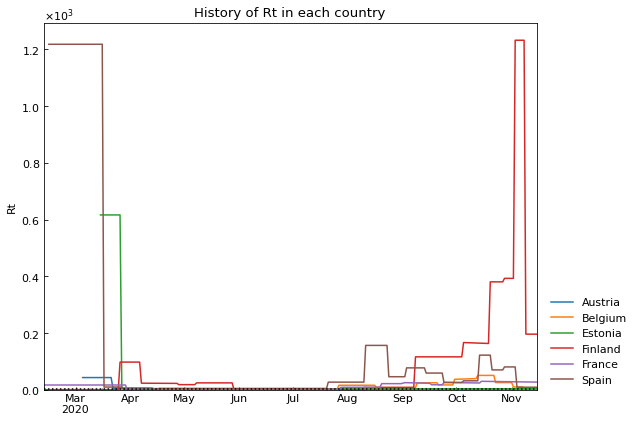

Country,Austria,Belgium,Estonia,Finland,France,Spain
Date,,,,,,
2020-11-11,2.64,5.26,3.39,195.87,26.82,8.77
2020-11-12,2.64,5.26,3.39,195.87,26.82,8.77
2020-11-13,2.64,5.26,3.39,195.87,26.82,8.77
2020-11-14,2.64,5.26,3.39,195.87,26.82,8.77
2020-11-15,2.64,5.26,3.39,195.87,26.82,8.77


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

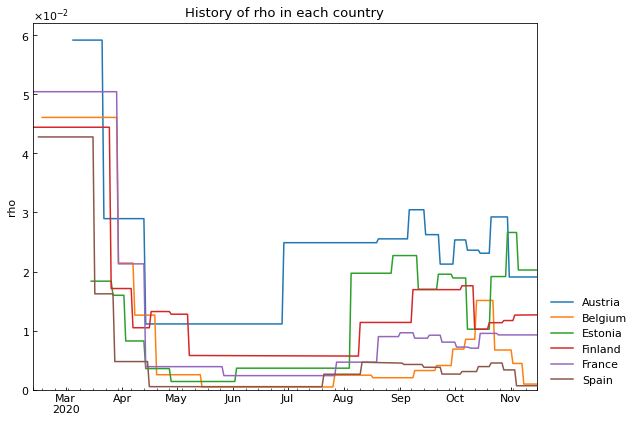

Country,Austria,Belgium,Estonia,Finland,France,Spain
Date,,,,,,
2020-11-11,0.019079,0.000953,0.020263,0.012671,0.009277,0.000669
2020-11-12,0.019079,0.000953,0.020263,0.012671,0.009277,0.000669
2020-11-13,0.019079,0.000953,0.020263,0.012671,0.009277,0.000669
2020-11-14,0.019079,0.000953,0.020263,0.012671,0.009277,0.000669
2020-11-15,0.019079,0.000953,0.020263,0.012671,0.009277,0.000669


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

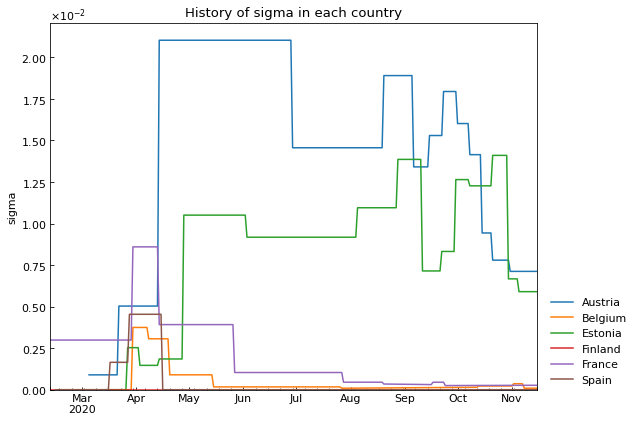

Country,Austria,Belgium,Estonia,Finland,France,Spain
Date,,,,,,
2020-11-11,0.00712,0.000091,0.005899,0.0,0.000266,0.0
2020-11-12,0.00712,0.000091,0.005899,0.0,0.000266,0.0
2020-11-13,0.00712,0.000091,0.005899,0.0,0.000266,0.0
2020-11-14,0.00712,0.000091,0.005899,0.0,0.000266,0.0
2020-11-15,0.00712,0.000091,0.005899,0.0,0.000266,0.0


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

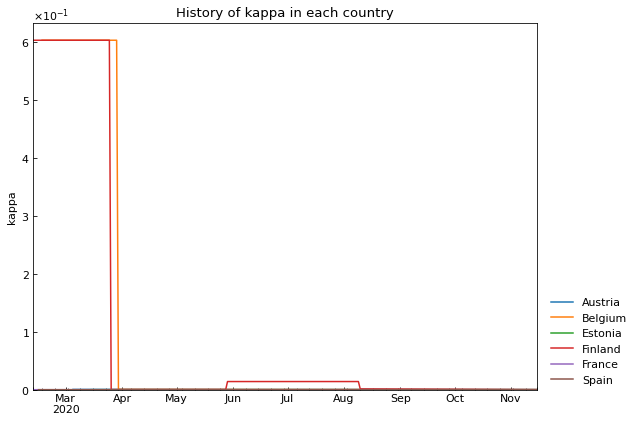

Country,Austria,Belgium,Estonia,Finland,France,Spain
Date,,,,,,
2020-11-11,0.000098,0.00007,0.000079,0.000065,0.000079,0.000066
2020-11-12,0.000098,0.00007,0.000079,0.000065,0.000079,0.000066
2020-11-13,0.000098,0.00007,0.000079,0.000065,0.000079,0.000066
2020-11-14,0.000098,0.00007,0.000079,0.000065,0.000079,0.000066
2020-11-15,0.000098,0.00007,0.000079,0.000065,0.000079,0.000066


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

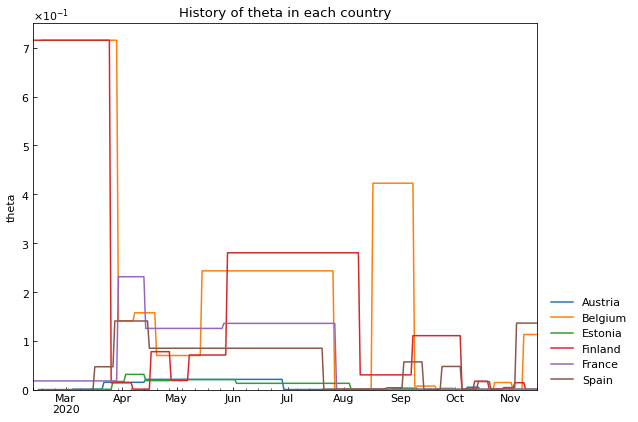

Country,Austria,Belgium,Estonia,Finland,France,Spain
Date,,,,,,
2020-11-11,0.000436,0.112948,0.000885,0.000565,0.000892,0.136321
2020-11-12,0.000436,0.112948,0.000885,0.000565,0.000892,0.136321
2020-11-13,0.000436,0.112948,0.000885,0.000565,0.000892,0.136321
2020-11-14,0.000436,0.112948,0.000885,0.000565,0.000892,0.136321
2020-11-15,0.000436,0.112948,0.000885,0.000565,0.000892,0.136321


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16542 entries, 0 to 16611
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 16542 non-null  datetime64[ns]
 1   Country                              16542 non-null  object        
 2   Rt                                   16542 non-null  float64       
 3   theta                                16542 non-null  float64       
 4   kappa                                16542 non-null  float64       
 5   rho                                  16542 non-null  float64       
 6   sigma                                16542 non-null  float64       
 7   School_closing                       16542 non-null  int64         
 8   Workplace_closing                    16542 non-null  int64         
 9   Cancel_events                        16542 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.159375,-0.029217,0.365055,-0.149288,-0.355304,-0.344259,-0.363359,-0.461379,-0.338230,-0.342709,-0.337308,-0.428579,0.039744,-0.199553,-0.045577,-0.341597
theta,-0.159375,1.000000,0.697486,-0.084539,-0.131541,0.164272,0.145961,0.133804,0.050976,-0.143355,0.062874,0.127250,0.093013,-0.013703,-0.313534,-0.091416,0.139607
kappa,-0.029217,0.697486,1.000000,0.223137,-0.061132,-0.134570,-0.122053,-0.163653,-0.190963,-0.203934,-0.140743,-0.110329,-0.150812,-0.121169,-0.161740,-0.086278,-0.151556
rho,0.365055,-0.084539,0.223137,1.000000,0.212550,-0.500644,-0.535146,-0.545901,-0.675347,-0.455499,-0.356293,-0.509983,-0.726285,-0.471294,-0.303421,-0.250895,-0.519110
sigma,-0.149288,-0.131541,-0.061132,0.212550,1.000000,-0.083906,-0.105656,-0.047832,-0.075552,0.093532,0.248160,-0.202201,-0.126183,0.018710,0.261669,0.255084,-0.098425
School_closing,-0.355304,0.164272,-0.134570,-0.500644,-0.083906,1.000000,0.869931,0.718019,0.560200,0.464858,0.680207,0.424301,0.668257,0.366035,-0.260206,-0.219852,0.874853
Workplace_closing,-0.344259,0.145961,-0.122053,-0.535146,-0.105656,0.869931,1.000000,0.788697,0.609076,0.479308,0.680609,0.372119,0.676811,0.375365,-0.161346,-0.163120,0.853001
Cancel_events,-0.363359,0.133804,-0.163653,-0.545901,-0.047832,0.718019,0.788697,1.000000,0.544683,0.450803,0.569844,0.375386,0.658398,0.502291,0.009373,0.033707,0.826543
Gatherings_restrictions,-0.461379,0.050976,-0.190963,-0.675347,-0.075552,0.560200,0.609076,0.544683,1.000000,0.544018,0.575418,0.719815,0.693106,0.464096,0.320749,0.377706,0.709334
Transport_closing,-0.338230,-0.143355,-0.203934,-0.455499,0.093532,0.464858,0.479308,0.450803,0.544018,1.000000,0.511889,0.448379,0.553778,0.377113,0.292647,0.236995,0.544991


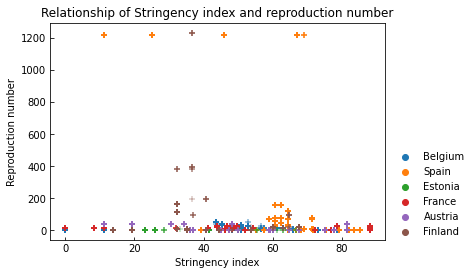

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()